In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

data_file = open("mnist_train.csv","r")
data_list = data_file.readlines()
data_file.close()

In [2]:
len(data_list)

60000

In [3]:
train_data, test_data = train_test_split(data_list,test_size=0.3) 
len(train_data)

42000

In [4]:
# first value is label, rest is data
train_data[0]

'7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,138,27,0,0,0,0,0,0,0,110,255,118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,238,217,10,0,0,0,0,0,106,244,254,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104,254,168,31,0,0,50,179,249,254,254,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,254,254,227,128,110,235,243,112,179,254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,92,176,254,254,137,31,0,200,254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,231,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,254,118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,246,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0

7


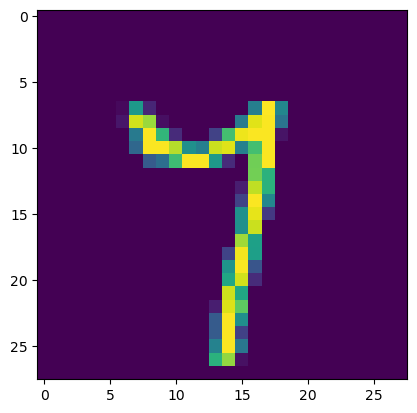

In [5]:
all_values = train_data[0].split(",")
print(all_values[0])

# reshaping each row into 28x28 data
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array)

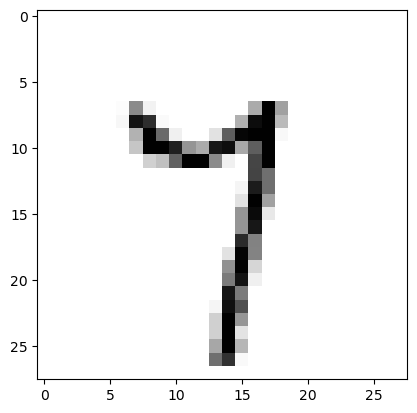

In [6]:
plt.imshow(image_array,cmap='Greys',interpolation='None')

In [7]:
# Neural network with a single hidden layer
# input layer contains 784 = 28x28 nodes
# number of nodes in hidden layer = n (to be experimented)
# output layer contains 10 nodes for each numbers (0to 9)


class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learningrate = learning_rate
        
        self.Weight_input_hidden = np.random.uniform(-1, 1, size = (hidden_nodes,input_nodes))
        self.Weight_hidden_output = np.random.uniform(-1, 1, size = (output_nodes,hidden_nodes))
        
    def query(self,inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        hidden_outputs = sigmoid(np.dot(self.Weight_input_hidden,inputs))
        final_outputs = sigmoid(np.dot(self.Weight_hidden_output,hidden_outputs))
        return final_outputs
    
    def train(self,inputs_list,targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_outputs = sigmoid(np.dot(self.Weight_input_hidden,inputs))
        final_outputs = sigmoid(np.dot(self.Weight_hidden_output,hidden_outputs))
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.Weight_hidden_output.T, output_errors)
        
        self.Weight_hidden_output += self.learningrate * np.dot((output_errors * final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs))
        
        self.Weight_input_hidden +=self.learningrate * np.dot((hidden_errors * hidden_outputs*(1.0-hidden_outputs)),np.transpose(inputs))
        
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [8]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.4
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [9]:
# Check Neural Network works for a given input
n.query((np.asfarray(all_values[1:])/255.0+0.99)+0.01)

array([[0.99973404],
       [0.96320562],
       [0.014692  ],
       [0.3204576 ],
       [0.56283061],
       [0.59052011],
       [0.00255045],
       [0.12596623],
       [0.09483495],
       [0.90658951]])

In [12]:
# Scale the input values to range of 0.01 to 1.00
# Target array of size 10 is initialized to 0.01 
# for given label, value in target is updated to 0.99
# for eg: label = 9 
#                    0    1    2    3    4    5     6    7   8     9
# initial target = [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 ]
# updated target = [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 ]

def train_nn(n,train_data):
    for i in train_data:
        all_values = i.split(",")
        inputs = (np.asfarray(all_values[1:]) /255.0 *0.99)+0.01
        targets = np.zeros(output_nodes)+0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
        
train_nn(n,train_data)

In [16]:
# test the neural network

def test_nn(n,test_data):
    score = []
    for i in test_data:
        labels = i.split(",")
        correct_label = int(labels[0])
    
        inputs = (np.asfarray(labels[1:]) /255.0 *0.99)+0.01
        outputs = n.query(inputs)
        label = np.argmax(outputs)
        if(label == correct_label):
            score.append(1)
        else:
            score.append(0)
    return score

# Calculate performance score
def calc_score(score):
    score_array = np.asarray(score)
    performance = (score_array.sum()/score_array.size)*100
    return performance

score = test_nn(n,test_data)
performance = calc_score(score)
print("Performance : ",performance,"%")

Performance :  93.48333333333333 %


In [47]:
# To find the relation between hidden nodes and accuracy
import time

hidden_node_array = []
score_array = []
time_array = []
arr = np.arange(10,201,10)

print("Progress : ")
for i in arr:
    # get the start time
    st = time.time()
    
    hidden_nodes = i
    n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
    train_nn(n,train_data)
    score = test_nn(n,test_data)
    performance = calc_score(score)
    
    # store number of nodes info and performance% for plotting
    hidden_node_array.append(i)
    score_array.append(performance)
    
    # get the end time
    et = time.time()
    
    # get the execution time
    elapsed_time = et - st
    time_array.append(elapsed_time)
    
    if (hidden_nodes % 10 == 0):
        print((hidden_nodes/200)*100,"%...")

Progress : 
5.0 %...
10.0 %...
15.0 %...
20.0 %...
25.0 %...
30.0 %...
35.0 %...
40.0 %...
45.0 %...
50.0 %...
55.00000000000001 %...
60.0 %...
65.0 %...
70.0 %...
75.0 %...
80.0 %...
85.0 %...
90.0 %...
95.0 %...
100.0 %...


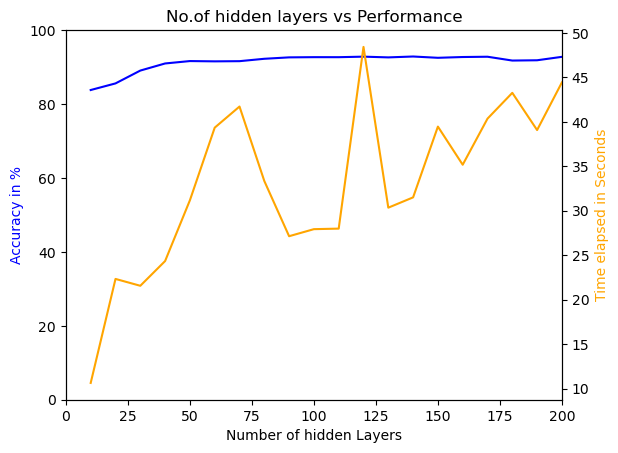

In [56]:
# Relation between Number of hidden layers and accuracy
fig, ax1 = plt.subplots()
ax1.plot(hidden_node_array,score_array,color="blue")
ax1.set_xlabel("Number of hidden Layers")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Accuracy in %",color="blue")
ax1.set_ylim(0, 100)
ax1.set_title('No.of hidden layers vs Performance')

ax2 = ax1.twinx()
ax2.set_ylabel("Time elapsed in Seconds",color="orange")
ax2.plot(hidden_node_array,time_array,color="orange" )

plt.show()